#

In [1]:
import geopandas as gp
import geodatasets
from plotnine import (
    ggplot,
    aes,
    coord_fixed,
    facet_wrap,
    geom_map,
    geom_text,
    labs,
    scale_fill_brewer,
    scale_fill_continuous,
    scale_x_continuous,
    scale_y_continuous,
    scale_size_continuous,
    stage,
    coord_cartesian,
    element_line,
    element_rect,
    element_text,
    theme_void,
    theme,
)

Define some useful functions

In [2]:
def good_centroid(geometry):
    """
    Calculate "good" centroids for polygons in the geometry

    The polygon is projected onto the Equal Area Cylindrical projection,
    the centroids are computed, then mapped back onto the original
    coordinate system.
    """
    return geometry.to_crs("+proj=cea").centroid.to_crs(geometry.crs)


def overlay_color(rgb_hex_colors, light="white", dark="black", threshold=0.5):
    """
    Decide which color is suitable to write onto the given colors
    """
    def luminance(rgb_hex):
        """
        Calculate the Luminance ([0, 1]) of a hex color
        """
        r = int(rgb_hex[1:3], 16)
        g = int(rgb_hex[3:5], 16)
        b = int(rgb_hex[5:], 16)
        luma = (r*0.299 + g*0.587 + b*0.0722) / 256
        return luma
    return [light if luminance(x) < threshold  else dark for x in rgb_hex_colors]

### A Map from `geodatasets`

We are going to use a dataset from the
[geodatasets](https://geodatasets.readthedocs.io/en/latest/) package. We
can explore the dataset providers at `geodatasets.data`, each of which
has one or more datasets:

In [3]:
geodatasets.data

geodatasets.Bunch 
 5 items 
 
 
 
 
 
 
 geoda geodatasets.Bunch 
 
 
 
 
 
 
 geodatasets.Bunch 
 53 items 
 
 
 
 
 
 
 airbnb geodatasets.Dataset 
 
 
 
 
 
 
 geodatasets.Dataset 
 geoda.airbnb 
 
 
 
 url https://geodacenter.github.io/data-and-lab//data/airbnb.zip license NA attribution Center for Spatial Data Science, University of Chicago description Airbnb rentals, socioeconomics, and crime in Chicago geometry_type Polygon nrows 77 ncols 21 details https://geodacenter.github.io/data-and-lab//airbnb/ hash a2ab1e3f938226d287dd76cde18c00e2d3a260640dd826da7131827d9e76c824 filename airbnb.zip 
 
 
 
 
 
 
 
 
 
 
 atlanta geodatasets.Dataset 
 
 
 
 
 
 
 geodatasets.Dataset 
 geoda.atlanta 
 
 
 
 url https://geodacenter.github.io/data-and-lab//data/atlanta_hom.zip license NA attribution Center for Spatial Data Science, University of Chicago description Atlanta, GA region homicide counts and rates geometry_type Polygon nrows 90 ncols 24 details https://geodacenter.github.io/data-and-lab//atlanta_old/ hash a33a76e12168fe84361e60c88a9df4856730487305846c559715c89b1a2b5e09 filename atlanta_hom.zip members ['atlanta_hom/atl_hom.geojson'] 
 
 
 
 
 
 
 
 
 
 
 cars geodatasets.Dataset 
 
 
 
 
 
 
 geodatasets.Dataset 
 geoda.cars 
 
 
 
 url https://geodacenter.github.io/data-and-lab//data/Abandoned_Vehicles_Map.csv license NA attribution Center for Spatial Data Science, University of Chicago description 2011 abandoned vehicles in Chicago (311 complaints). geometry_type Point nrows 137867 ncols 21 details https://geodacenter.github.io/data-and-lab//1-source-and-description/ hash 6a0b23bc7eda2dcf1af02d43ccf506b24ca8d8c6dc2fe86a2a1cc051b03aae9e filename Abandoned_Vehicles_Map.csv 
 
 
 
 
 
 
 
 
 
 
 charleston1 geodatasets.Dataset 
 
 
 
 
 
 
 geodatasets.Dataset 
 geoda.charleston1 
 
 
 
 url https://geodacenter.github.io/data-and-lab//data/CharlestonMSA.zip license NA attribution Center for Spatial Data Science, University of Chicago description 2000 Census Tract Data for Charleston, SC MSA and counties geometry_type Polygon nrows 117 ncols 31 details https://geodacenter.github.io/data-and-lab//charleston-1_old/ hash 4a4fa9c8dd4231ae0b2f12f24895b8336bcab0c28c48653a967cffe011f63a7c filename CharlestonMSA.zip members ['CharlestonMSA/sc_final_census2.gpkg'] 
 
 
 
 
 
 
 
 
 
 
 charleston2 geodatasets.Dataset 
 
 
 
 
 
 
 geodatasets.Dataset 
 geoda.charleston2 
 
 
 
 url https://geodacenter.github.io/data-and-lab//data/CharlestonMSA2.zip license NA attribution Center for Spatial Data Science, University of Chicago description 1998 and 2001 Zip Code Business Patterns (Census Bureau) for Charleston, SC MSA geometry_type Polygon nrows 42 ncols 60 details https://geodacenter.github.io/data-and-lab//charleston2/ hash 056d5d6e236b5bd95f5aee26c77bbe7d61bd07db5aaf72866c2f545205c1d8d7 filename CharlestonMSA2.zip members ['CharlestonMSA2/CharlestonMSA2.gpkg'] 
 
 
 
 
 
 
 
 
 
 
 chicago_health geodatasets.Dataset 
 
 
 
 
 
 
 geodatasets.Dataset 
 geoda.chicago_health 
 
 
 
 url https://geodacenter.github.io/data-and-lab//data/comarea.zip license NA attribution Center for Spatial Data Science, University of Chicago description Chicago Health + Socio-Economics geometry_type Polygon nrows 77 ncols 87 details https://geodacenter.github.io/data-and-lab//comarea_vars/ hash 4e872adb552786eae2fcd745524696e5e4cd33cc9a6c032471c0e75328871401 filename comarea.zip 
 
 
 
 
 
 
 
 
 
 
 chicago_commpop geodatasets.Dataset 
 
 
 
 
 
 
 geodatasets.Dataset 
 geoda.chicago_commpop 
 
 
 
 url https://geodacenter.github.io/data-and-lab//data/chicago_commpop.zip license NA attribution Center for Spatial Data Science, University of Chicago description Chicago Community Area Population Percent Change for 2000 and 2010 geometry_type Polygon nrows 77 ncols 9 details https://geodacenter.github.io/data-and-lab//commpop/ hash 1dbebb50c8ea47e2279ea819ef64ba793bdee2b88e4716bd6c6ec0e0d8e0e05b filename chicago_commpop.zip members ['chicago_commpop/chicago

We choose the dataset of Sudden Infant Death (SIDS) counts from counties
in North Carolina. We can see some meta information about that dataset.

In [4]:
geodatasets.data.geoda.sids

geodatasets.Dataset 
 geoda.sids 
 
 
 
 url https://geodacenter.github.io/data-and-lab//data/sids.zip license NA attribution Center for Spatial Data Science, University of Chicago description North Carolina county SIDS death counts geometry_type Polygon nrows 100 ncols 15 details https://geodacenter.github.io/data-and-lab//sids/ hash e2f7b210b9a57839423fd170e47c02cf7a2602a480a1036bb0324e1112a4eaab filename sids.zip members ['sids/sids.gpkg']

Download the dataset we want (it is automatically cached).

In [5]:
geodatasets.fetch("geoda sids")

Read data

In [6]:
sids = gp.read_file(geodatasets.get_path("geoda.sids"))
sids.head()

The `sids` data has two periods `1974 - 1978` and `1979 - 1985`. For
each period there is a number of births and a number of deaths. We want
to visually compare the deaths per 1000 in each county for the two
periods.

In [7]:
data = sids.copy()

# Calculate the death per 1000
data["1974 - 1978"] = (data["SID74"] / data["BIR74"]) * 1000
data["1979 - 1984"] = (data["SID79"] / data["BIR79"]) * 1000

# Calculate center coordinates for the counties
data["center_lon"] = good_centroid(data.geometry).x
data["center_lat"] = good_centroid(data.geometry).y

# Make the data
data = data.melt(
    id_vars=["NAME", "geometry", "center_lon", "center_lat"],
    value_vars=["1974 - 1978", "1979 - 1984"],
    var_name="period",
    value_name="deaths_per_1k",
).rename(
    {"NAME": "county"},
    axis=1
)

data.head()

Plot the data

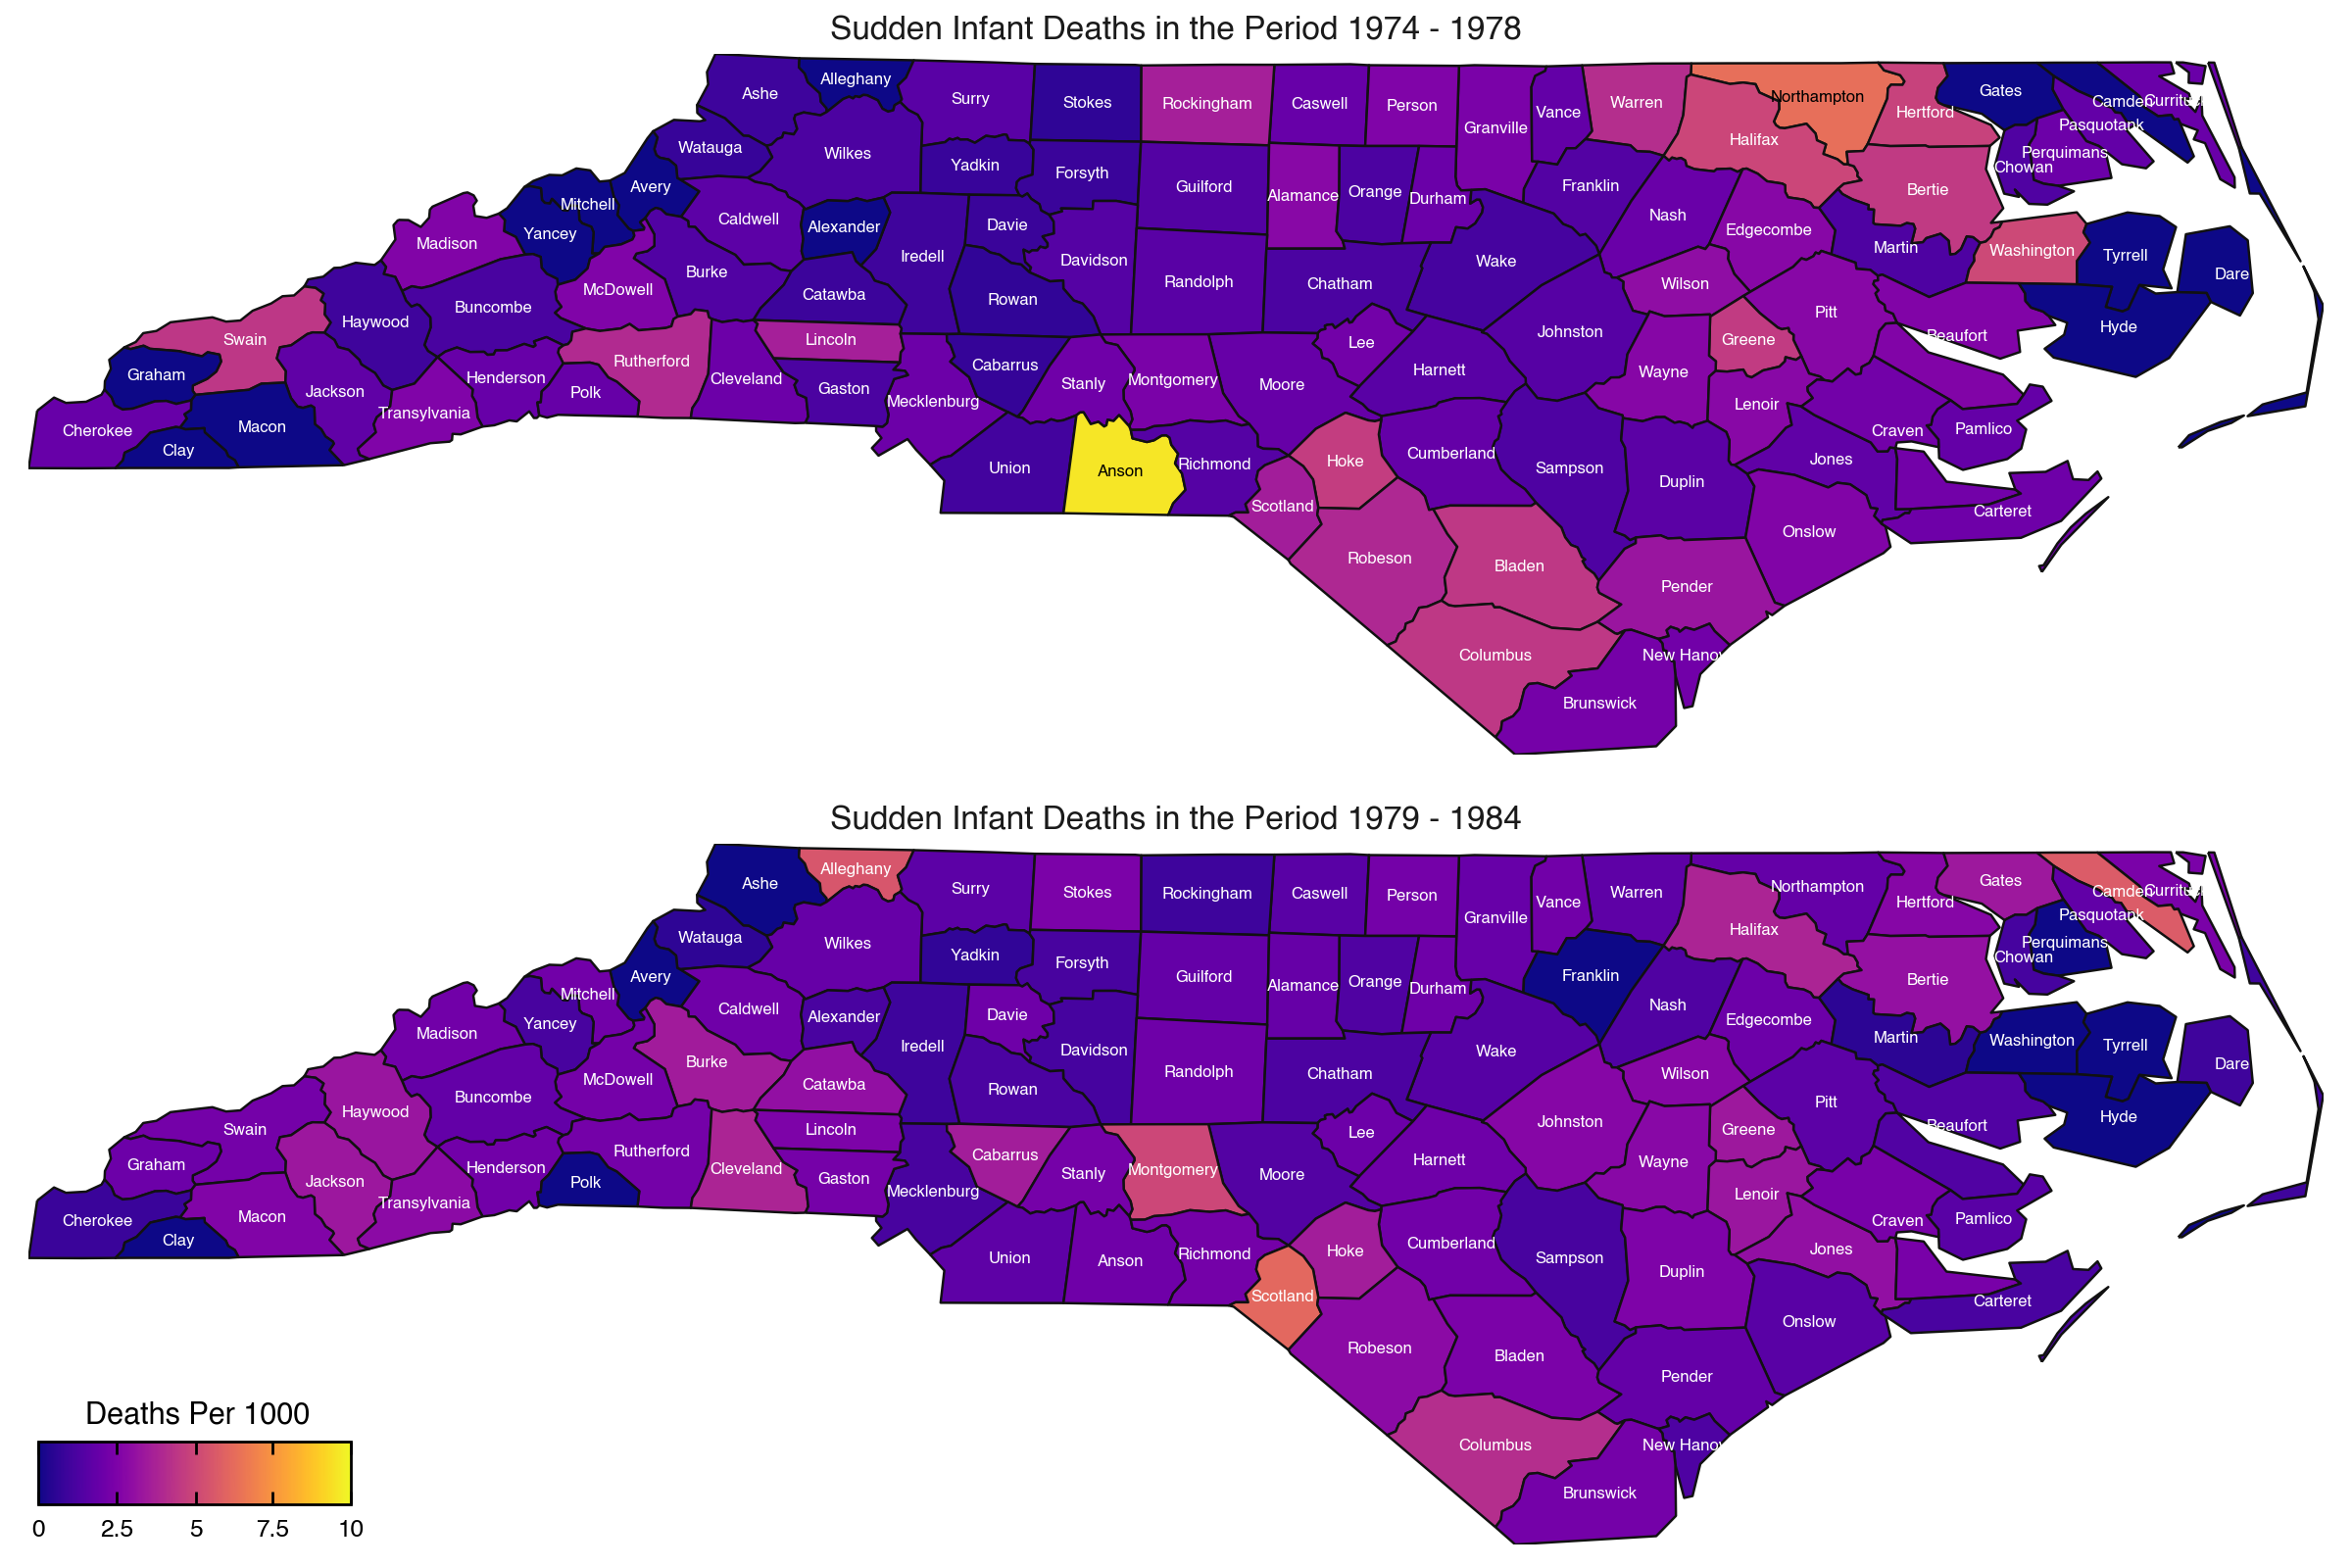

In [8]:
# Gallery, maps

(
    ggplot(data)
    + geom_map(aes(fill="deaths_per_1k"))
    + geom_text(
        aes(
            "center_lon",
            "center_lat",
            label="county",
            color=stage("deaths_per_1k", after_scale="overlay_color(color)")
        ),
        size=6,
        show_legend=False
    )
    + scale_fill_continuous(
        name="Deaths Per 1000",
        cmap_name="plasma",
        breaks=[0, 2.5, 5, 7.5, 10],
        labels=["0", "2.5", "5", "7.5", "10"],
        limits=[0, 10],
    )
    + facet_wrap(
        "period",
        ncol=1,
        labeller=lambda s: f"Sudden Infant Deaths in the Period {s}"
    )
    + coord_fixed(expand=False)
    + theme_void()
    + theme(
        figure_size=(12, 8),
        legend_position=(0, 0),
        legend_direction="horizontal",
        legend_title_position="top",
        plot_margin=0.01,
        plot_background=element_rect(fill="white"),
        panel_spacing=0.025,
        legend_frame=element_rect(color="black"),
        legend_ticks=element_line(color="black"),
        strip_text=element_text(size=12),
    )
)

### The Territories of Westeros

*Layering different features on a Map*

Read data and select features in Westeros only.

In [9]:
continents = gp.read_file("data/lands-of-ice-and-fire/continents.shp")
islands = gp.read_file("data/lands-of-ice-and-fire/islands.shp")
lakes = gp.read_file("data/lands-of-ice-and-fire/lakes.shp")
rivers = gp.read_file("data/lands-of-ice-and-fire/rivers.shp")
political = gp.read_file("data/lands-of-ice-and-fire/political.shp")
wall = gp.read_file("data/lands-of-ice-and-fire/wall.shp")
roads = gp.read_file("data/lands-of-ice-and-fire/roads.shp")
locations = gp.read_file("data/lands-of-ice-and-fire/locations.shp")

westeros = continents.query('name=="Westeros"')
islands = islands.query('continent=="Westeros" and name!="Summer Islands"')
lakes = lakes.query('continent=="Westeros"')
rivers = rivers.query('continent=="Westeros"')
roads = roads.query('continent=="Westeros"')

wg = westeros.geometry[0]
bool_idx = [wg.contains(g) for g in locations.geometry]
westeros_locations = locations[bool_idx]
cities = westeros_locations[westeros_locations["type"] == "City"].copy()

Create map by placing the features in layers in an order that limits
obstraction.

The `GeoDataFrame.geometry.centroid` property has the center coordinates
of polygons, we use these to place the labels of the political regions.

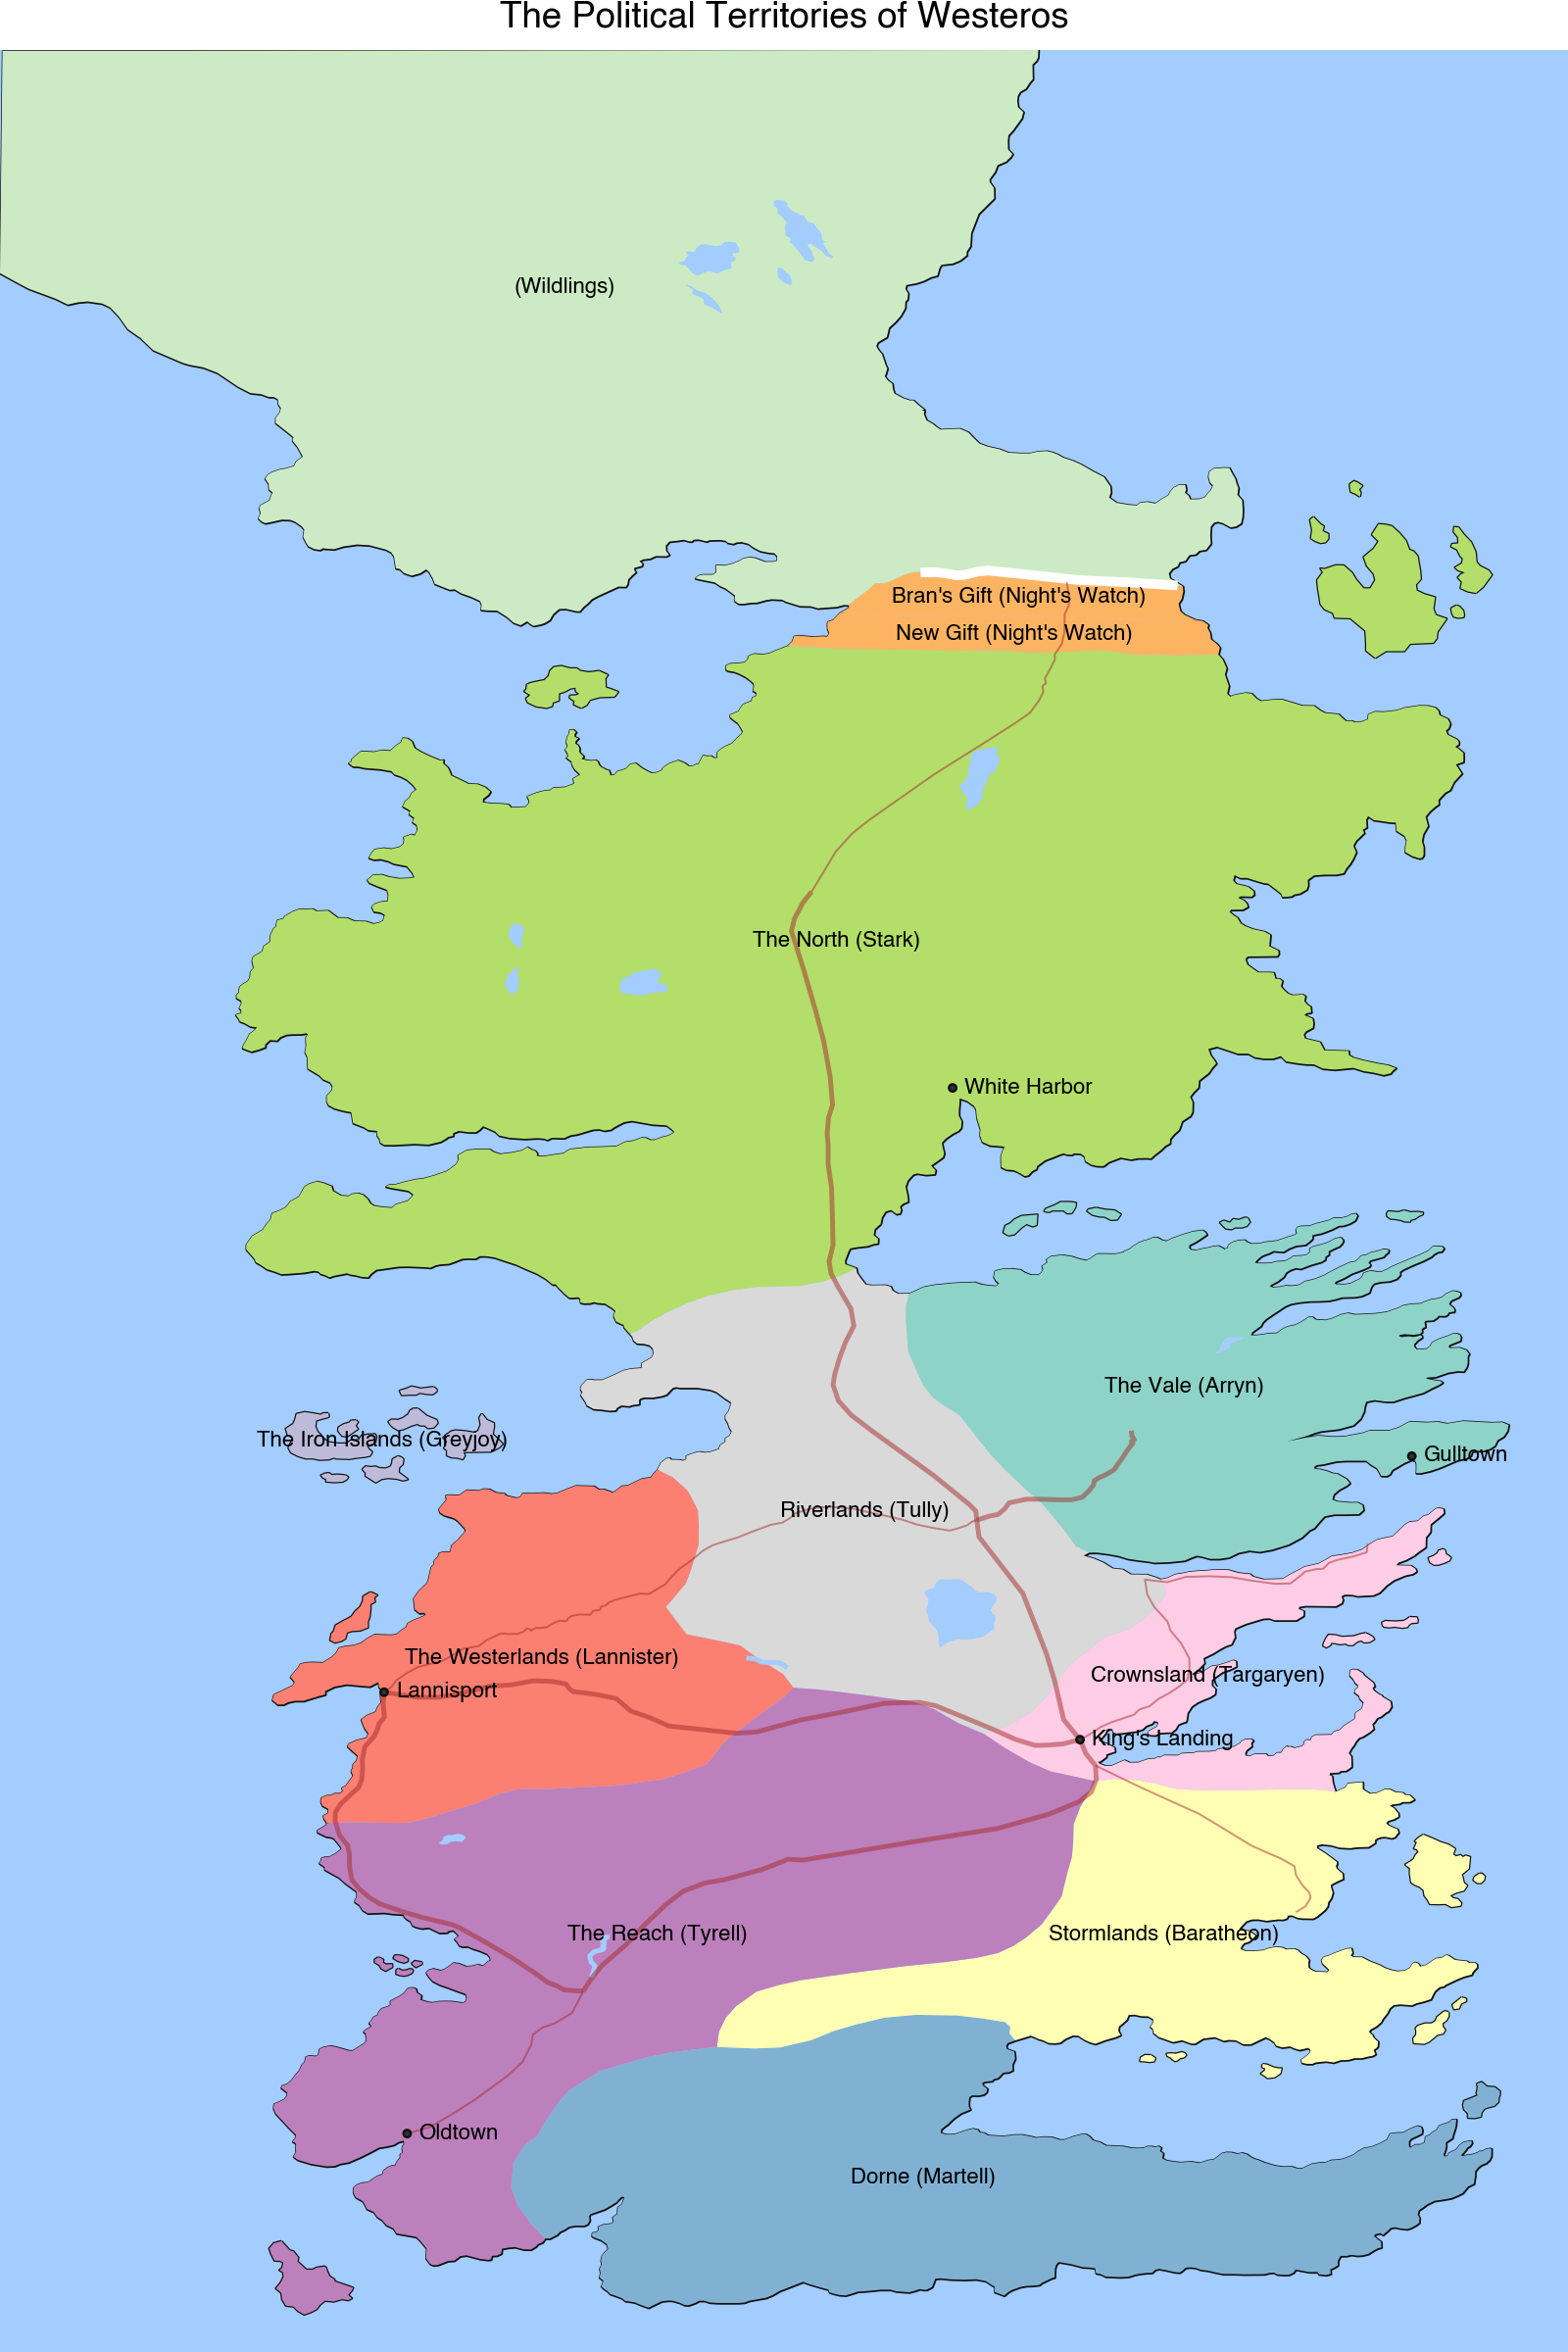

In [10]:
# Gallery, maps

# colors
water_color = "#a3ccff"
wall_color = "white"
road_color = "brown"


# Create label text by merging the territory name and
# the claimant to the territory
def fmt_labels(names, claimants):
    labels = []
    for name, claimant in zip(names, claimants):
        if name:
            labels.append("{} ({})".format(name, claimant))
        else:
            labels.append("({})".format(claimant))
    return labels


def calculate_center(df):
    """
    Calculate the centre of a geometry

    This method first converts to a planar crs, gets the centroid
    then converts back to the original crs. This gives a more
    accurate
    """
    original_crs = df.crs
    planar_crs = "EPSG:3857"
    return df["geometry"].to_crs(planar_crs).centroid.to_crs(original_crs)


political["center"] = calculate_center(political)
cities["center"] = calculate_center(cities)

(
    ggplot()
    + geom_map(westeros, fill=None)
    + geom_map(islands, fill=None)
    + geom_map(political, aes(fill="ClaimedBy"), color=None, show_legend=False)
    + geom_map(wall, color=wall_color, size=2)
    + geom_map(lakes, fill=water_color, color=None)
    + geom_map(rivers, aes(size="size"), color=water_color, show_legend=False)
    + geom_map(roads, aes(size="size"), color=road_color, alpha=0.5, show_legend=False)
    + geom_map(cities, size=1)
    + geom_text(
        political,
        aes("center.x", "center.y", label="fmt_labels(name, ClaimedBy)"),
        size=8,
        fontweight="bold",
    )
    + geom_text(
        cities,
        aes("center.x", "center.y", label="name"),
        size=8,
        ha="left",
        nudge_x=0.20,
    )
    + labs(title="The Political Territories of Westeros")
    + scale_fill_brewer(type="qual", palette=8)
    + scale_x_continuous(expand=(0, 0, 0, 1))
    + scale_y_continuous(expand=(0, 1, 0, 0))
    + scale_size_continuous(range=(0.4, 1))
    + coord_cartesian()
    + theme_void()
    + theme(figure_size=(8, 12), panel_background=element_rect(fill=water_color))
)

**Credit**:
[cadaei](https://www.cartographersguild.com/member.php?u=95244) of the
[cartographersguild](https://www.cartographersguild.com/) website forum.